In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

batter = pd.read_csv('./data/batter_dataset.csv', encoding='utf-8-sig')
pitcher = pd.read_csv('./data/pitcher_dataset.csv', encoding='utf-8-sig')

# 타자 MVP

In [2]:
train_b = batter[batter['연도'] <= 2019]
val_b = batter[batter['연도'] == 2020]
test_b = batter[batter['연도'] == 2021]

In [3]:
X_train_b = train_b.drop(columns=['이름', '연도', '소속', 'y'])
y_train_b = train_b['y']

X_val_b = val_b.drop(columns=['이름', '연도', '소속', 'y'])
y_val_b = val_b['y']

X_test_b = test_b.drop(columns=['이름', '연도', '소속', 'y'])
y_test_b = test_b['y']

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000


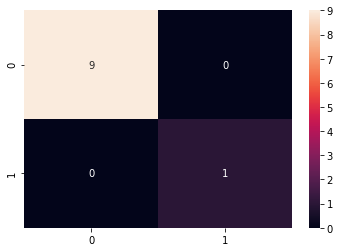

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

scaler = MinMaxScaler()
X_train_b_scaled = scaler.fit_transform(X_train_b)
X_val_b_scaled = scaler.transform(X_val_b)
X_test_b_scaled = scaler.transform(X_test_b)

lr = LogisticRegression()
lr.fit(X_train_b_scaled, y_train_b)

pred = lr.predict(X_val_b_scaled)
print(f'정확도: {accuracy_score(y_val_b, pred):.4f}')
print(f'정밀도: {precision_score(y_val_b, pred):.4f}')
print(f'재현율: {recall_score(y_val_b, pred):.4f}')

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data=confusion_matrix(y_val_b, pred), vmin=0, annot=True)
plt.show()

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000


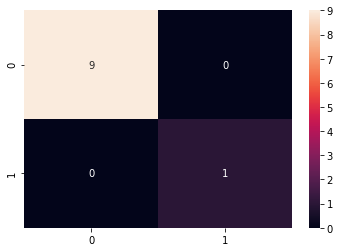

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train_b, y_train_b)

pred = rf.predict(X_val_b)
print(f'정확도: {accuracy_score(y_val_b, pred):.4f}')
print(f'정밀도: {precision_score(y_val_b, pred):.4f}')
print(f'재현율: {recall_score(y_val_b, pred):.4f}')

sns.heatmap(data=confusion_matrix(y_val_b, pred), vmin=0, annot=True)
plt.show()

## 2020년

In [6]:
proba = lr.predict_proba(X_val_b_scaled)[:, 1]
batter_names = batter[batter['연도']==2020]['이름'].values
for i in range(10):
    print(f'{batter_names[i]}: {proba[i]*100:.2f}%')

로하스: 57.05%
김하성: 4.65%
양의지: 4.62%
터커: 4.32%
최형우: 8.88%
이정후: 1.88%
김현수: 3.18%
황재균: 3.38%
나성범: 8.60%
손아섭: 1.67%


In [7]:
proba = rf.predict_proba(X_val_b)[:, 1]
batter_names = batter[batter['연도']==2020]['이름'].values
for i in range(10):
    print(f'{batter_names[i]}: {proba[i]*100:.2f}%')

로하스: 53.00%
김하성: 3.00%
양의지: 7.00%
터커: 4.00%
최형우: 4.00%
이정후: 0.00%
김현수: 1.00%
황재균: 1.00%
나성범: 10.00%
손아섭: 1.00%


## 2021년

In [8]:
proba = lr.predict_proba(X_test_b_scaled)[:, 1]
batter_names = batter[batter['연도']==2021]['이름'].values
for i in range(10):
    print(f'{batter_names[i]}: {proba[i]*100:.2f}%')

홍창기: 2.58%
이정후: 3.18%
강백호: 2.57%
최정: 7.93%
양의지: 9.64%
구자욱: 6.41%
전준우: 2.61%
알테어: 5.61%
김재환: 4.09%
김혜성: 1.92%


In [9]:
proba = rf.predict_proba(X_test_b)[:, 1]
batter_names = batter[batter['연도']==2021]['이름'].values
for i in range(10):
    print(f'{batter_names[i]}: {proba[i]*100:.2f}%')

홍창기: 4.00%
이정후: 2.00%
강백호: 1.00%
최정: 14.00%
양의지: 4.00%
구자욱: 0.00%
전준우: 1.00%
알테어: 4.00%
김재환: 1.00%
김혜성: 2.00%


### 주요 feature

In [10]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lr, random_state=1).fit(X_train_b_scaled, y_train_b)
eli5.show_weights(perm, feature_names = X_train_b.columns.tolist())

Weight,Feature
0.0142 ± 0.0026,홀더
0.0047 ± 0.0021,홈런
0.0037 ± 0.0042,타점
0.0032 ± 0.0039,루타
0.0032 ± 0.0021,WAR
0.0026 ± 0.0000,wRC+
0.0011 ± 0.0026,장타
0.0005 ± 0.0021,wOBA
0 ± 0.0000,우승
0 ± 0.0000,도실


In [11]:
perm = PermutationImportance(rf, random_state=1).fit(X_train_b, y_train_b)
eli5.show_weights(perm, feature_names = X_train_b.columns.tolist())

Weight,Feature
0.0258 ± 0.0061,홀더
0.0121 ± 0.0054,홈런
0.0053 ± 0.0033,출루
0.0026 ± 0.0000,타율
0 ± 0.0000,타석
0 ± 0.0000,타수
0 ± 0.0000,득점
0 ± 0.0000,안타
0 ± 0.0000,2타
0 ± 0.0000,3타


permutation importance를 확인했을 때 타이틀 개수와 홈런 수가 가장 중요하다.

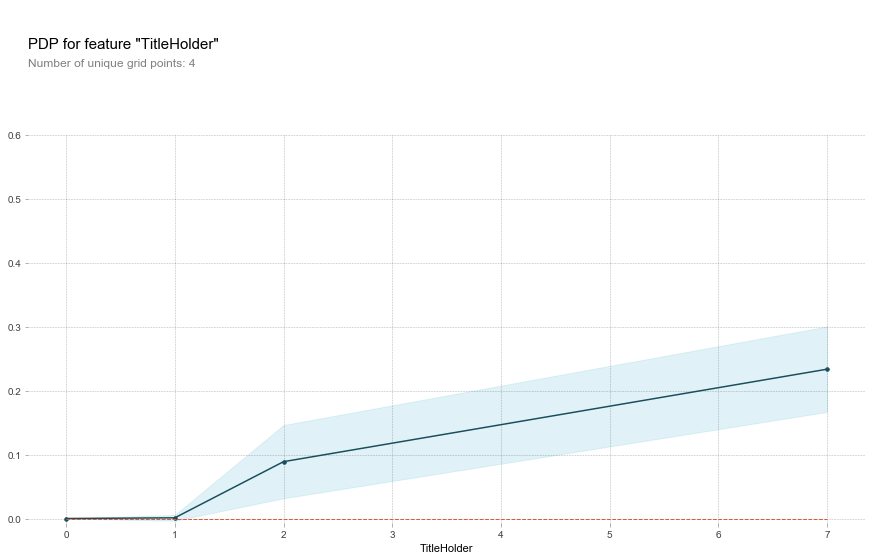

In [12]:
from pdpbox import pdp, get_dataset, info_plots

pdp_mvp = pdp.pdp_isolate(model=rf, dataset=X_train_b, model_features=X_train_b.columns.tolist(), feature='홀더')

pdp.pdp_plot(pdp_mvp, 'TitleHolder')
plt.show()

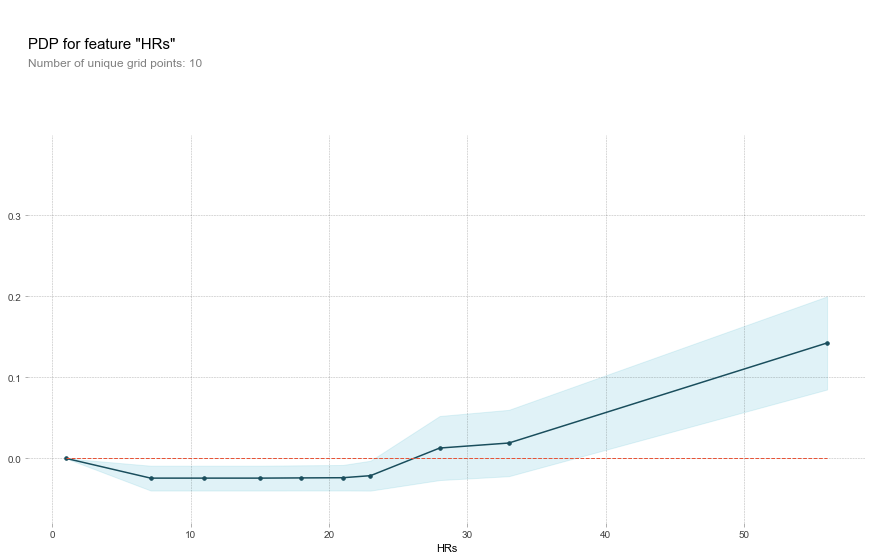

In [13]:
pdp_mvp = pdp.pdp_isolate(model=rf, dataset=X_train_b, model_features=X_train_b.columns.tolist(), feature='홈런')

pdp.pdp_plot(pdp_mvp, 'HRs')
plt.show()

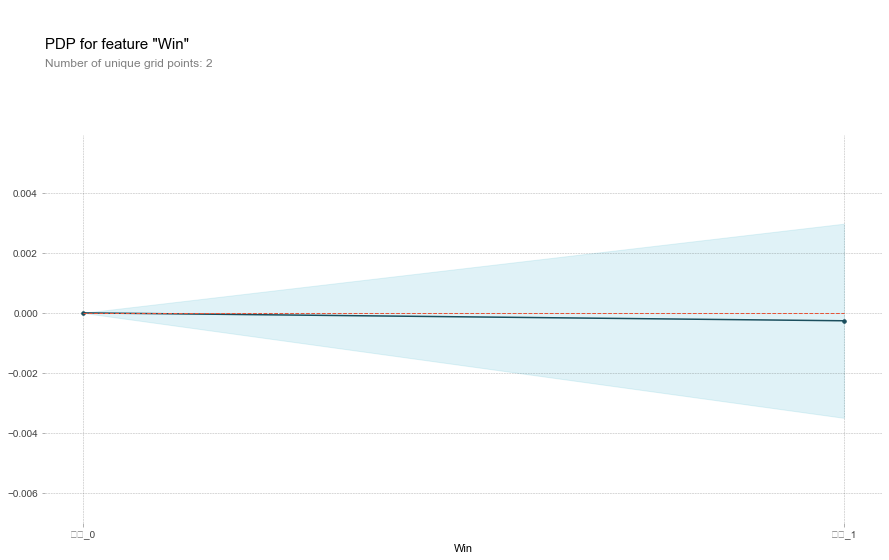

In [19]:
pdp_mvp = pdp.pdp_isolate(model=rf, dataset=X_train_b, model_features=X_train_b.columns.tolist(), feature='우승')

pdp.pdp_plot(pdp_mvp, 'Win')
plt.show()

PDP를 확인했을 때 역시 타이틀, 홈런 수가 많으면 많을수록 MVP 확률이 증가한다. 또한 팀의 우승은 MVP와 큰 연관이 없다.

In [18]:
import shap

data_for_prediction = X_val_b.iloc[0]
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

2020년 로하스가 MVP를 받을 수 있던 주 요인은 타이틀 수와 홈런이라고 생각된다.

In [24]:
data_for_prediction = X_test_b.iloc[3]
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

2021년 최정이 MVP를 받지 못한 주 요인은 타이틀 수가 부족했기 때문이라고 생각된다.

In [25]:
data_for_prediction = X_test_b.iloc[0]
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

2021년 타자 WAR 1위인 홍창기가 MVP를 받지 못한 주 요인은 타이틀 수와 홈런, 장타율이 낮았기 때문이라고 생각된다.

# 투수 MVP

In [26]:
train_p = pitcher[pitcher['연도'] <= 2019]
val_p = pitcher[pitcher['연도'] == 2020]
test_p = pitcher[pitcher['연도'] == 2021]

In [27]:
X_train_p = train_p.drop(columns=['이름', '연도', '소속', 'y'])
y_train_p = train_p['y']

X_val_p = val_p.drop(columns=['이름', '연도', '소속', 'y'])
y_val_p = val_p['y']

X_test_p = test_p.drop(columns=['이름', '연도', '소속', 'y'])
y_test_p = test_p['y']

정확도: 1.0000
정밀도: 0.0000
재현율: 0.0000


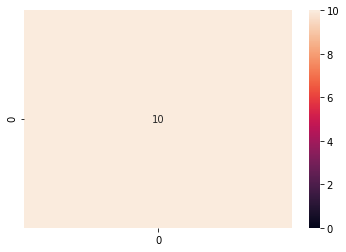

In [28]:
scaler = MinMaxScaler()
X_train_p_scaled = scaler.fit_transform(X_train_p)
X_val_p_scaled = scaler.transform(X_val_p)
X_test_p_scaled = scaler.transform(X_test_p)

lr = LogisticRegression()
lr.fit(X_train_p_scaled, y_train_p)

pred = lr.predict(X_val_p_scaled)
print(f'정확도: {accuracy_score(y_val_p, pred):.4f}')
print(f'정밀도: {precision_score(y_val_p, pred):.4f}')
print(f'재현율: {recall_score(y_val_p, pred):.4f}')

sns.heatmap(data=confusion_matrix(y_val_p, pred), vmin=0, annot=True)
plt.show()

정확도: 1.0000
정밀도: 0.0000
재현율: 0.0000


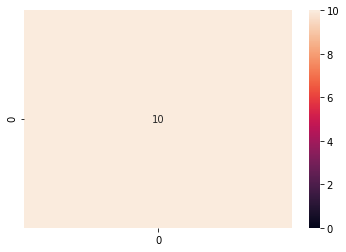

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train_p, y_train_p)

pred = rf.predict(X_val_p)
print(f'정확도: {accuracy_score(y_val_p, pred):.4f}')
print(f'정밀도: {precision_score(y_val_p, pred):.4f}')
print(f'재현율: {recall_score(y_val_p, pred):.4f}')

sns.heatmap(data=confusion_matrix(y_val_p, pred), vmin=0, annot=True)
plt.show()

## 2020년

In [30]:
proba = lr.predict_proba(X_val_p_scaled)[:, 1]
pitcher_names = pitcher[pitcher['연도']==2020]['이름'].values
for i in range(10):
    print(f'{pitcher_names[i]}: {proba[i]*100:.2f}%')

알칸타라: 15.87%
스트레일리: 7.25%
브룩스: 1.59%
루친스키: 4.82%
요키시: 3.17%
뷰캐넌: 1.18%
구창모: 2.80%
켈리: 1.33%
플렉센: 1.20%
최채흥: 0.55%


In [31]:
proba = rf.predict_proba(X_val_p)[:, 1]
pitcher_names = pitcher[pitcher['연도']==2020]['이름'].values
for i in range(10):
    print(f'{pitcher_names[i]}: {proba[i]*100:.2f}%')

알칸타라: 32.00%
스트레일리: 9.00%
브룩스: 2.00%
루친스키: 1.00%
요키시: 6.00%
뷰캐넌: 0.00%
구창모: 1.00%
켈리: 0.00%
플렉센: 1.00%
최채흥: 1.00%


## 2021년

In [32]:
proba = lr.predict_proba(X_test_p_scaled)[:, 1]
pitcher_names = pitcher[pitcher['연도']==2021]['이름'].values
for i in range(10):
    print(f'{pitcher_names[i]}: {proba[i]*100:.2f}%')

미란다: 14.55%
백정현: 1.48%
고영표: 2.14%
켈리: 1.10%
원태인: 1.23%
요키시: 3.99%
뷰캐넌: 5.32%
루친스키: 1.17%
수아레즈: 3.56%
최원준: 1.06%


In [33]:
proba = rf.predict_proba(X_test_p)[:, 1]
pitcher_names = pitcher[pitcher['연도']==2021]['이름'].values
for i in range(10):
    print(f'{pitcher_names[i]}: {proba[i]*100:.2f}%')

미란다: 35.00%
백정현: 9.00%
고영표: 2.00%
켈리: 0.00%
원태인: 1.00%
요키시: 0.00%
뷰캐넌: 0.00%
루친스키: 0.00%
수아레즈: 0.00%
최원준: 0.00%


### 주요 feature

In [34]:
perm = PermutationImportance(lr, random_state=1).fit(X_train_p_scaled, y_train_p)
eli5.show_weights(perm, feature_names = X_train_p.columns.tolist())

Weight,Feature
0.0058 ± 0.0021,홀더
0.0021 ± 0.0021,승
0.0011 ± 0.0026,삼진
0 ± 0.0000,선발
0 ± 0.0000,실점
0 ± 0.0000,세
0 ± 0.0000,타자
0 ± 0.0000,피안
0 ± 0.0000,출장
0 ± 0.0000,패


In [35]:
perm = PermutationImportance(rf, random_state=1).fit(X_train_p, y_train_p)
eli5.show_weights(perm, feature_names = X_train_p.columns.tolist())

Weight,Feature
0.0258 ± 0.0021,홀더
0.0037 ± 0.0042,승
0.0037 ± 0.0026,폭투
0.0021 ± 0.0021,사구
0.0021 ± 0.0021,WAR
0.0016 ± 0.0026,패
0 ± 0.0000,타자
0 ± 0.0000,자책
0 ± 0.0000,실점
0 ± 0.0000,이닝


투수 역시 타자와 마찬가지로 타이틀 수가 가장 중요하며 승수가 다음을 이었다.

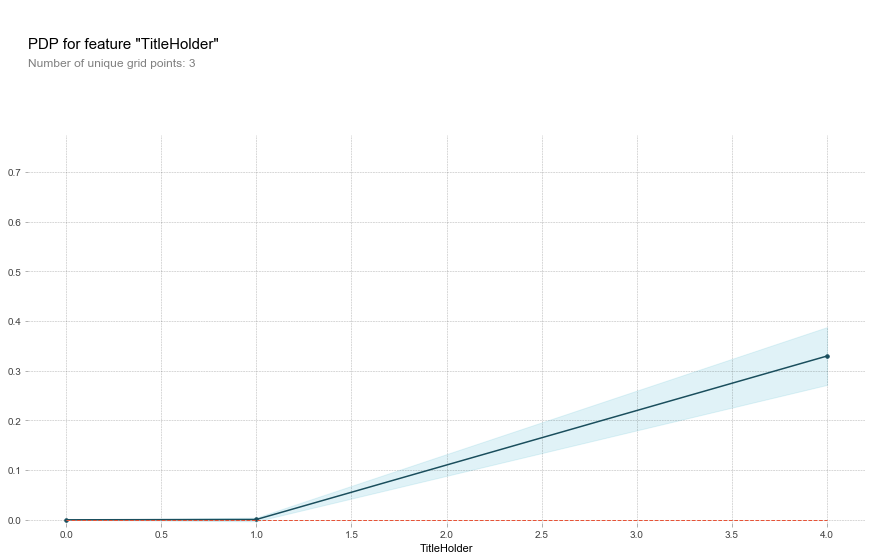

In [36]:
pdp_mvp = pdp.pdp_isolate(model=rf, dataset=X_train_p, model_features=X_train_p.columns.tolist(), feature='홀더')

pdp.pdp_plot(pdp_mvp, 'TitleHolder')
plt.show()

In [37]:
data_for_prediction = X_test_p.iloc[0]
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

승수가 적었던 점이 랜덤포레스트 모델에게는 별로였나보다.

In [38]:
data_for_prediction = X_val_p.iloc[0]
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

2020년 알칸타라가 2021년에 이 성적을 내었다면 MVP를 받았을 수도 있겠다.

# 결론
2020년과 2021년 MVP 확률을 확인한 결과  
2020년 MVP 확률 1위 = 로하스(53\~57%), 2위 = 알칸타라(15\~32%)  
2021년 MVP 확률 1위 = 미란다(14\~35%), 2위 = 최정(7\~14%)  

각 연도별로 1위를 뽑는 것인데다가 투수와 타자의 기록이 다르기 때문에 모델을 만들기 힘들 거라 생각했는데, 막상 따로 만든 뒤 확률상 1위인 선수 한 명만 골라내니 정확한 결과가 나와서 놀랐다.  
2022년 MVP는 1982년부터 2021년까지 모든 기록을 가지고 예측을 해보면 재미있을 것 같다.